In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.measurements import label
import os 
import shutil
import pandas as pd

## Functions

In [5]:
def imshow_components(labels, save=False, name=None):
    '''
        Show every detected component in the image 
    '''
#     Map component labels to hue val
    label_hue = np.uint8(1234*labels/np.max(labels) % 179)
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    show_img(labeled_img)
    if save: 
        cv2.imwrite(f'{name}.png', labeled_img)        
   
def show_img(gray_img):
    plt.imshow(gray_img, cmap='gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()

    
def padding(image, padding_size):
    WHITE = (255,255,255)
    
    return  cv2.copyMakeBorder(image.copy(),padding_size, padding_size, padding_size, padding_size ,cv2.BORDER_CONSTANT, value=WHITE)


#extract every components and save it to separated files
def extract_components(image, is_padding=False, save=False, name=None):
    '''
        return components 
    '''
    image_copy = image.copy()
    gray_image = image
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        pass
    gray_image = cv2.bitwise_not(gray_image)
    
    num_label, labels, states, centroids =cv2.connectedComponentsWithStats(gray_image, connectivity=8)
    
    print(num_label)
    components = []
    
    target_path = f'lines\\{file_name}'
    if save: 
        try:
            os.makedirs(target_path)
        except FileExistsError as e: 
            shutil.rmtree(target_path, ignore_errors = True)
            os.makedirs(target_path, exist_ok = True)
        except OSError as e:  
            if e.errno != os.errno.EEXIST:
                raise   
                
    for i in range(1, num_label ):
        left, top, width, height, _ = states[i]
        component =  gray_image[top:top+height, left:left+width]

        if is_padding: 
            component = padding(component, 3 )
        components.append(component)
        image_copy = cv2.rectangle(image_copy, (top -1 , left -1 ), (left+width+1, height+top+1), (0, 255,0), 1)
        
        
        if save:
            cv2.imwrite(f'{target_path}\\{i}.png', component)
        cv2.imwrite(f'{target_path}\\{file_name}.png', image_copy)
    
    return components


def read_gray_img(file_name):
    image = cv2.imread(file_name)
    image = cv2.resize(image, (0,0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST )
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.bitwise_not(gray_image)
    
    return gray_image

Interating through each line and extract components using connected component labeling in Scipy Library, the extrated lines will be saved in to same directory with original line with name "extracted_{line_name}"

lines\Kh Battambang 12\Line 0.png
78 components detected


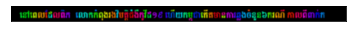

lines\Kh Battambang 12\Line 1.png
76 components detected


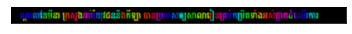

lines\Kh Battambang 12\Line 2.png
78 components detected


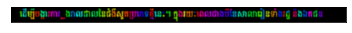

lines\Kh Battambang 12\Line 3.png
57 components detected


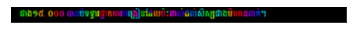

lines\Kh Battambang 12\Line 4.png
74 components detected


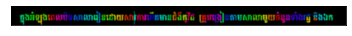

lines\Kh Battambang 12\Line 5.png
45 components detected


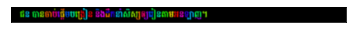

lines\Kh Battambang 14\Line 0.png
66 components detected


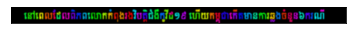

lines\Kh Battambang 14\Line 1.png
62 components detected


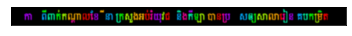

lines\Kh Battambang 14\Line 2.png
65 components detected


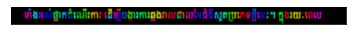

lines\Kh Battambang 14\Line 3.png
62 components detected


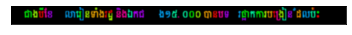

lines\Kh Battambang 14\Line 4.png
21 components detected


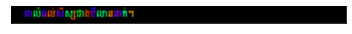

lines\Kh Battambang 14\Line 5.png
59 components detected


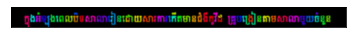

lines\Kh Battambang 14\Line 6.png
55 components detected


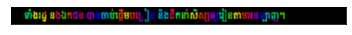

lines\Kh Battambang 18\Line 0.png
51 components detected


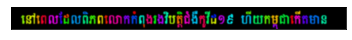

lines\Kh Battambang 18\Line 1.png
49 components detected


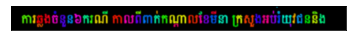

lines\Kh Battambang 18\Line 2.png
50 components detected


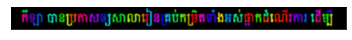

lines\Kh Battambang 18\Line 3.png
49 components detected


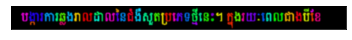

lines\Kh Battambang 18\Line 4.png
40 components detected


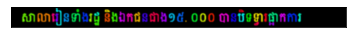

lines\Kh Battambang 18\Line 5.png
37 components detected


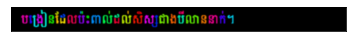

lines\Kh Battambang 18\Line 6.png
49 components detected


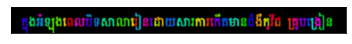

lines\Kh Battambang 18\Line 7.png
46 components detected


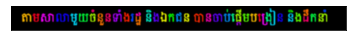

lines\Kh Battambang 18\Line 8.png
19 components detected


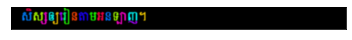

lines\Kh Battambang 22\Line 0.png
44 components detected


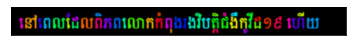

lines\Kh Battambang 22\Line 1.png
43 components detected


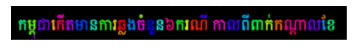

lines\Kh Battambang 22\Line 2.png
39 components detected


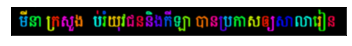

lines\Kh Battambang 22\Line 3.png
45 components detected


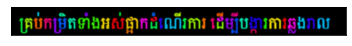

lines\Kh Battambang 22\Line 4.png
42 components detected


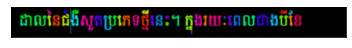

lines\Kh Battambang 22\Line 5.png
37 components detected


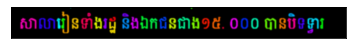

lines\Kh Battambang 22\Line 6.png
42 components detected


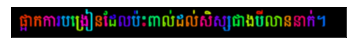

lines\Kh Battambang 22\Line 7.png
44 components detected


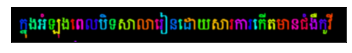

lines\Kh Battambang 22\Line 8.png
38 components detected


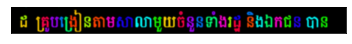

lines\Kh Battambang 22\Line 9.png
42 components detected


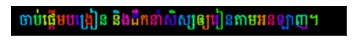

lines\Khmer OS Freehand 12\Line 0.png
65 components detected


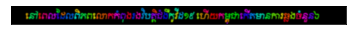

lines\Khmer OS Freehand 12\Line 1.png
57 components detected


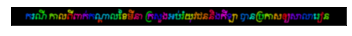

lines\Khmer OS Freehand 12\Line 2.png
64 components detected


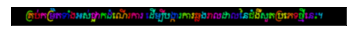

lines\Khmer OS Freehand 12\Line 3.png
58 components detected


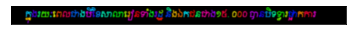

lines\Khmer OS Freehand 12\Line 4.png
35 components detected


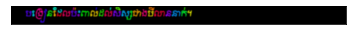

lines\Khmer OS Freehand 12\Line 5.png
56 components detected


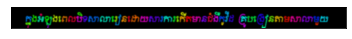

lines\Khmer OS Freehand 12\Line 6.png
56 components detected


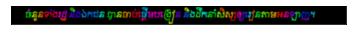

lines\Khmer OS Freehand 14\Line 0.png
59 components detected


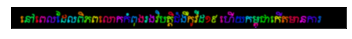

lines\Khmer OS Freehand 14\Line 1.png
53 components detected


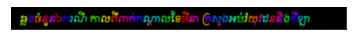

lines\Khmer OS Freehand 14\Line 2.png
53 components detected


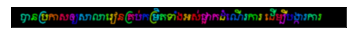

lines\Khmer OS Freehand 14\Line 3.png
56 components detected


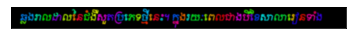

lines\Khmer OS Freehand 14\Line 4.png
54 components detected


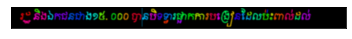

lines\Khmer OS Freehand 14\Line 5.png
14 components detected


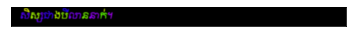

lines\Khmer OS Freehand 14\Line 6.png
54 components detected


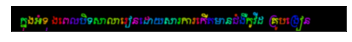

lines\Khmer OS Freehand 14\Line 7.png
48 components detected


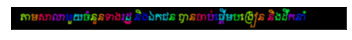

lines\Khmer OS Freehand 14\Line 8.png
19 components detected


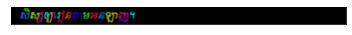

lines\Khmer OS Freehand 18\Line 0.png
46 components detected


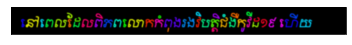

lines\Khmer OS Freehand 18\Line 1.png
40 components detected


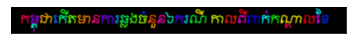

lines\Khmer OS Freehand 18\Line 2.png
39 components detected


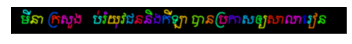

lines\Khmer OS Freehand 18\Line 3.png
45 components detected


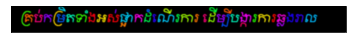

lines\Khmer OS Freehand 18\Line 4.png
44 components detected


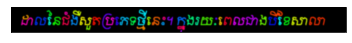

lines\Khmer OS Freehand 18\Line 5.png
40 components detected


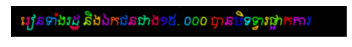

lines\Khmer OS Freehand 18\Line 6.png
36 components detected


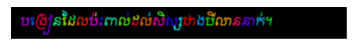

lines\Khmer OS Freehand 18\Line 7.png
45 components detected


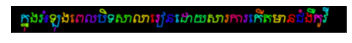

lines\Khmer OS Freehand 18\Line 8.png
38 components detected


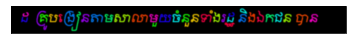

lines\Khmer OS Freehand 18\Line 9.png
40 components detected


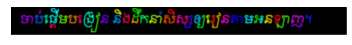

lines\Khmer OS Freehand 22\Line 0.png
38 components detected


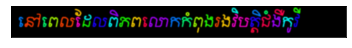

lines\Khmer OS Freehand 22\Line 1.png
34 components detected


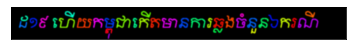

lines\Khmer OS Freehand 22\Line 2.png
33 components detected


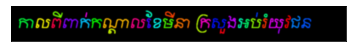

lines\Khmer OS Freehand 22\Line 3.png
30 components detected


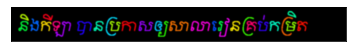

lines\Khmer OS Freehand 22\Line 4.png
37 components detected


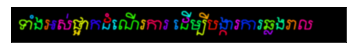

lines\Khmer OS Freehand 22\Line 5.png
38 components detected


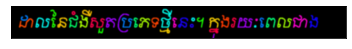

lines\Khmer OS Freehand 22\Line 6.png
33 components detected


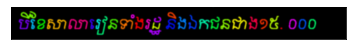

lines\Khmer OS Freehand 22\Line 7.png
35 components detected


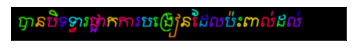

lines\Khmer OS Freehand 22\Line 8.png
15 components detected


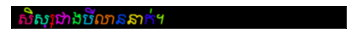

lines\Khmer OS Muol 12\Line 0.png
53 components detected


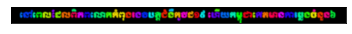

lines\Khmer OS Muol 12\Line 1.png
48 components detected


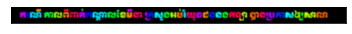

lines\Khmer OS Muol 12\Line 2.png
57 components detected


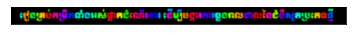

lines\Khmer OS Muol 12\Line 3.png
53 components detected


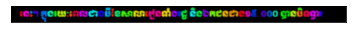

lines\Khmer OS Muol 12\Line 4.png
38 components detected


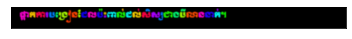

lines\Khmer OS Muol 12\Line 5.png
48 components detected


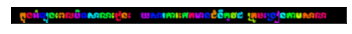

lines\Khmer OS Muol 12\Line 6.png
53 components detected


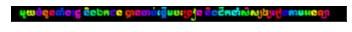

lines\Khmer OS Muol 12\Line 7.png
4 components detected


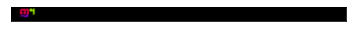

lines\Khmer OS Muol 14\Line 0.png
45 components detected


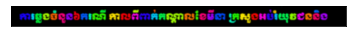

lines\Khmer OS Muol 14\Line 1.png
43 components detected


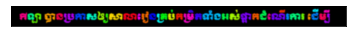

lines\Khmer OS Muol 14\Line 2.png
46 components detected


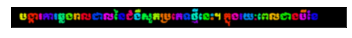

lines\Khmer OS Muol 14\Line 3.png
46 components detected


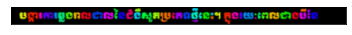

lines\Khmer OS Muol 14\Line 4.png
28 components detected


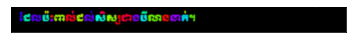

lines\Khmer OS Muol 14\Line 5.png
44 components detected


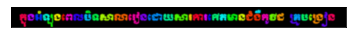

lines\Khmer OS Muol 14\Line 6.png
42 components detected


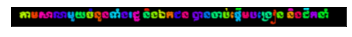

lines\Khmer OS Muol 14\Line 7.png
17 components detected


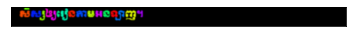

lines\Khmer OS Muol 18\Line 0.png
41 components detected


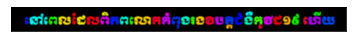

lines\Khmer OS Muol 18\Line 1.png
39 components detected


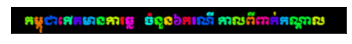

lines\Khmer OS Muol 18\Line 10.png
38 components detected


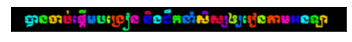

lines\Khmer OS Muol 18\Line 11.png
4 components detected


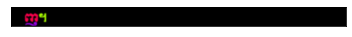

lines\Khmer OS Muol 18\Line 2.png
32 components detected


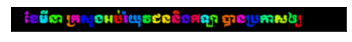

lines\Khmer OS Muol 18\Line 3.png
41 components detected


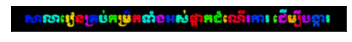

lines\Khmer OS Muol 18\Line 4.png
37 components detected


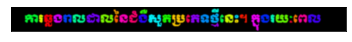

lines\Khmer OS Muol 18\Line 5.png
37 components detected


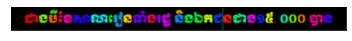

lines\Khmer OS Muol 18\Line 6.png
43 components detected


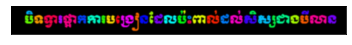

lines\Khmer OS Muol 18\Line 7.png
4 components detected


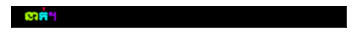

lines\Khmer OS Muol 18\Line 8.png
38 components detected


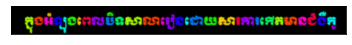

lines\Khmer OS Muol 18\Line 9.png
33 components detected


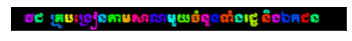

lines\Khmer OS Muol 22\Line 0.png
34 components detected


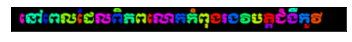

lines\Khmer OS Muol 22\Line 1.png
32 components detected


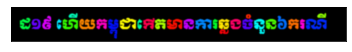

lines\Khmer OS Muol 22\Line 2.png
33 components detected


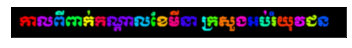

lines\Khmer OS Muol 22\Line 3.png
28 components detected


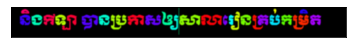

lines\Khmer OS Muol 22\Line 4.png
35 components detected


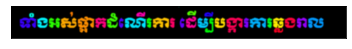

lines\Khmer OS Muol 22\Line 5.png
32 components detected


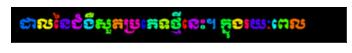

lines\Khmer OS Muol 22\Line 6.png
30 components detected


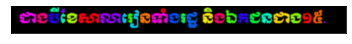

lines\Khmer OS Muol 22\Line 7.png
31 components detected


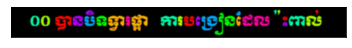

lines\Khmer OS Muol 22\Line 8.png
17 components detected


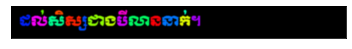

lines\Khmer OS siemreap 14\Line 0.png
73 components detected


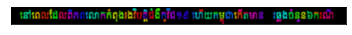

lines\Khmer OS siemreap 14\Line 1.png
67 components detected


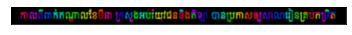

lines\Khmer OS siemreap 14\Line 2.png
70 components detected


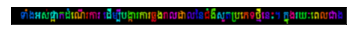

lines\Khmer OS siemreap 14\Line 3.png
62 components detected


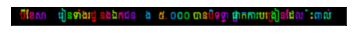

lines\Khmer OS siemreap 14\Line 4.png
18 components detected


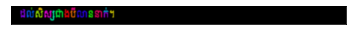

lines\Khmer OS siemreap 14\Line 5.png
63 components detected


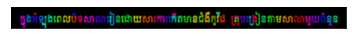

lines\Khmer OS siemreap 14\Line 6.png
54 components detected


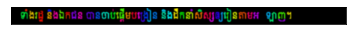

lines\Khmer OS Siemreap 18\Line 0.png
58 components detected


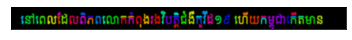

lines\Khmer OS Siemreap 18\Line 1.png
55 components detected


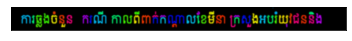

lines\Khmer OS Siemreap 18\Line 2.png
54 components detected


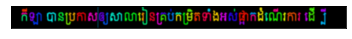

lines\Khmer OS Siemreap 18\Line 3.png
54 components detected


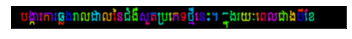

lines\Khmer OS Siemreap 18\Line 4.png
48 components detected


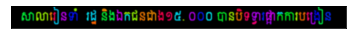

lines\Khmer OS Siemreap 18\Line 5.png
30 components detected


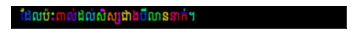

lines\Khmer OS Siemreap 18\Line 6.png
53 components detected


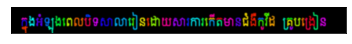

lines\Khmer OS Siemreap 18\Line 7.png
49 components detected


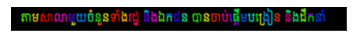

lines\Khmer OS Siemreap 18\Line 8.png
19 components detected


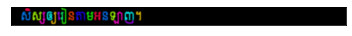

lines\Khmer OS Siemreap 22\Line 0.png
53 components detected


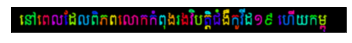

lines\Khmer OS Siemreap 22\Line 1.png
46 components detected


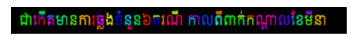

lines\Khmer OS Siemreap 22\Line 2.png
43 components detected


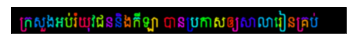

lines\Khmer OS Siemreap 22\Line 3.png
48 components detected


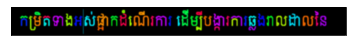

lines\Khmer OS Siemreap 22\Line 4.png
49 components detected


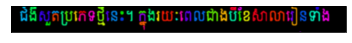

lines\Khmer OS Siemreap 22\Line 5.png
39 components detected


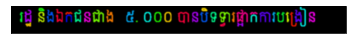

lines\Khmer OS Siemreap 22\Line 6.png
30 components detected


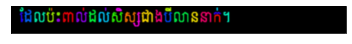

lines\Khmer OS Siemreap 22\Line 7.png
48 components detected


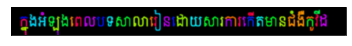

lines\Khmer OS Siemreap 22\Line 8.png
41 components detected


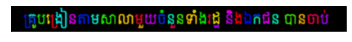

lines\Khmer OS Siemreap 22\Line 9.png
37 components detected


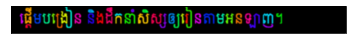

lines\Khmer OS Siemrep 12\Line 0.png
74 components detected


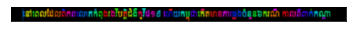

lines\Khmer OS Siemrep 12\Line 1.png
77 components detected


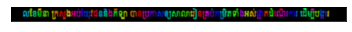

lines\Khmer OS Siemrep 12\Line 2.png
70 components detected


lines\Khmer OS Siemrep 12\Line 3.png
48 components detected


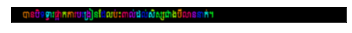

lines\Khmer OS Siemrep 12\Line 4.png
70 components detected


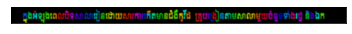

lines\Khmer OS Siemrep 12\Line 5.png
42 components detected


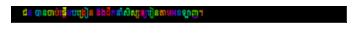

In [6]:
base_dir = os.getcwd()
for font in os.listdir( 'lines'):
    for line in os.listdir( os.path.join('lines', font)):
        file_name = os.path.join('lines', font, line)
        gray_image = read_gray_img(file_name)
        labels, num_label = label(gray_image)    
        
        print(file_name)
        print(f'{num_label} components detected')        
        imshow_components(labels, save=True, name= os.path.join('lines', font, f'extracted_{line}'))